# Unit 5 - Financial Planning

In [1]:
# Import libraries and dependencies
import os
import requests
import pandas as pd
import json 
import urllib
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Execute GET reqeuests using requests library
response_btc = requests.get(btc_url)
response_eth = requests.get(eth_url)

In [6]:
# Get response status code 
print(response_btc)
print(response_eth)

<Response [200]>
<Response [200]>


In [7]:
# Extract response content 
response_content_btc = response_btc.content
response_content_eth = response_eth.content

In [8]:
# Convert output to JSON 
btc_data = response_btc.json()
eth_data = response_eth.json()

In [9]:
# Format data with json.dumps 
print(json.dumps(btc_data, indent=4))
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18950006,
            "total_supply": 18950006,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41614.0,
                    "volume_24h": 14522418090,
                    "market_cap": 788367260326,
                    "percentage_change_1h": 0.167639267277375,
                    "percentage_change_24h": 0.162693947867496,
                    "percentage_change_7d": 8.84574422799939,
                    "percent_change_1h": 0.167639267277375,
                    "percent_change_24h": 0.162693947867496,
                    "percent_change_7d": 8.84574422799939
                },
                "CAD": {
                    "price": 53091.1412,
                    "volume_24h": 18527700999.222,
                    "m

In [10]:
# Compute value of Bitcoin in crypto wallet
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value

# Compute value of Ethereum in crypto wallet
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49936.80
The current value of your 5.3 ETH is $16016.39


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set up Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

## Create Alpaca API rest object 
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version="v2"
)

In [13]:
# Read in stock data using Alpaca API 
## Set timeframe to "1D"
timeframe = "1D"

# Format current date as ISO format 
start_date = pd.Timestamp("2022-02-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-03", tz="America/New_York").isoformat()

# Set timeframe to "ID"
timeframe = "1D"

# Set the stock tickers 
tickers = ["SPY", "AGG"]

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date,
).df

# Display sample data
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2022-02-03 00:00:00-05:00  111.26  111.37  111.13  111.27  9480330  450.95   

                                                             
                             high     low   close    volume  
time                                                         
2022-02-03 00:00:00-05:00  452.97  445.71  446.64  99110054

In [14]:
# Drop time component of date entries within 'time' column 
df_portfolio.index = df_portfolio.index.date
df_portfolio.head()

AGG                                      SPY                  \
              open    high     low   close   volume    open    high     low   
2022-02-03  111.26  111.37  111.13  111.27  9480330  450.95  452.97  445.71   

                              
             close    volume  
2022-02-03  446.64  99110054

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.27
Current SPY closing price: $446.64


In [16]:
# Compute the current value of share portfolio
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22332.00
The current value of your 200 AGG shares is $22254.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value
data = {'amount':[crypto_value, shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,65953.188
shares,44586.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

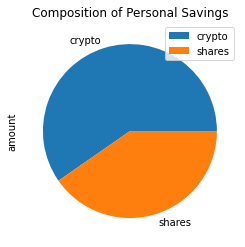

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [19]:
# Use conditional 'if' statements to validate if current savings are enough for emergency fund
# Set emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate health of household savings 
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Your total savings equal the minimum amount required for your emergency fund")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# GET 5 YEARS' WORTH OF HISTORICAL PRICE DATA FOR SPY AND AGG
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago 
start_date = pd.Timestamp("2017-03-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-02", tz="America/New_York").isoformat()

# Set the stock tickers 
ticker = ["AGG", "SPY"]

# Get 5 years worth of historical price data
df_ticker_data = api.get_barset(
    ticker, 
    timeframe,
    start=start_date, 
    end=end_date, 
    limit=1000,
).df

# Display sample data
df_ticker_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428.0   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074.0   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055.0   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853.0   
2018-02-22 00:00:00-05:00  106.49  106.5600  106.3600  106.36  2150355.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-02-15 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09  76314679.0  
2018-02-20 00:00:00-05:00  272.03  273.67  264.84  271.43  54829423.0  
2018-02-21 00:00:00-05:00  271.90  274.72  269.98  270.00  67813909.0  
2018-02-22 00:00:00-05:00  271.09  273.05  269.64  270.32  65771832.0

In [21]:
# Configure a Monte Carlo simulation to forecast 30 years daily returns
MC_30_years = MCSimulation(
    portfolio_data = df_ticker_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Execute Monte Carlo simulation to forecast 30 years cumulative returns 
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\CharbelNehme\CNA Immigration 1 Dropbox\Charbel Nehme\PC\Documents\FinTech_USyd\apis-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001436,0.998084,1.001605,1.002398,0.994045,1.011992,0.995786,0.992294,1.002854,0.997047,...,1.001952,0.994153,0.995206,1.000502,1.003539,1.001951,0.994789,1.004408,1.006927,0.995971
2,0.996002,0.998293,1.001720,1.001176,0.994313,1.027017,1.004568,0.986913,0.998446,0.995798,...,1.005161,1.001728,0.993600,0.998935,0.998406,1.006147,0.997111,0.997819,1.010220,0.994727
3,1.000172,0.996986,0.997527,1.016100,0.990624,1.034231,1.002731,0.997980,0.996587,0.986565,...,1.000618,1.004297,0.993167,1.001273,1.007972,1.008230,0.998429,0.991454,1.007348,0.995885
4,0.995826,0.998985,1.004608,1.022137,0.989429,1.029946,1.001892,1.004411,0.982841,0.993260,...,0.998400,0.985229,0.991437,1.002723,1.000606,1.003878,1.005735,0.976142,1.012781,0.992008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.980760,5.437885,5.724824,8.425829,20.679384,6.106003,4.682808,10.167661,3.999000,4.870344,...,6.082476,3.592207,6.990067,3.992538,2.712411,4.869150,8.439821,5.636212,4.182505,5.228884
7557,8.889727,5.445572,5.748526,8.476410,20.948119,6.099984,4.713908,10.120316,3.972750,4.867040,...,6.117258,3.563804,6.977887,3.981713,2.717770,4.891898,8.441995,5.645096,4.165220,5.227572
7558,8.959621,5.480350,5.756542,8.544903,21.197154,6.067083,4.707684,10.130263,4.014770,4.865909,...,6.150427,3.540403,6.984084,3.988759,2.704851,4.949473,8.472909,5.625858,4.172589,5.197273
7559,9.080456,5.477507,5.773760,8.453708,21.191829,6.060257,4.691618,10.084323,3.974269,4.878265,...,6.188054,3.558043,6.961359,3.987426,2.706774,4.949945,8.593205,5.644593,4.114815,5.247085


In [22]:
# Create DataFrame to hold the mean, median, minimum and maximum simulated performance 
simulated_returns_30_years = {
    "mean": list(MC_30_years.simulated_return.mean(axis=1)),
    "median": list(MC_30_years.simulated_return.median(axis=1)),
    "min": list(MC_30_years.simulated_return.min(axis=1)),
    "max": list(MC_30_years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_30_years = pd.DataFrame(simulated_returns_30_years)

# Display sample data
df_simulated_returns_30_years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000548,1.000571,0.982254,1.015522
2,1.000790,1.000303,0.977823,1.027017
3,1.001222,1.000619,0.969828,1.034231
4,1.001168,1.000848,0.966821,1.036378


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of Portfolio Investments Over Thirty Years'}>

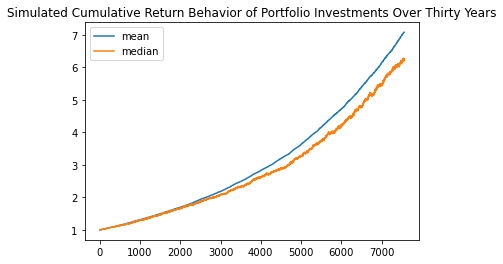

In [23]:
# Plot simulated cumulative return trajectory for portfolio over the next 30 years - mean and median forecasts used below. 
df_simulated_returns_30_years[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Portfolio Investments Over Thirty Years")

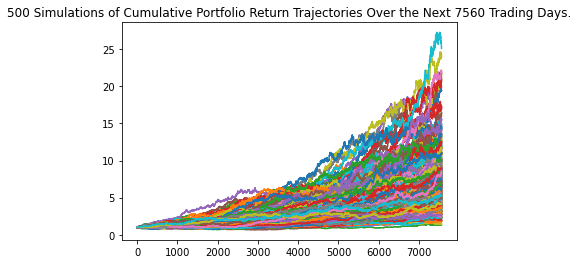

In [24]:
# Plot simulation outcomes: line Plot
simulated_returns_30_years = MC_30_years.plot_simulation()

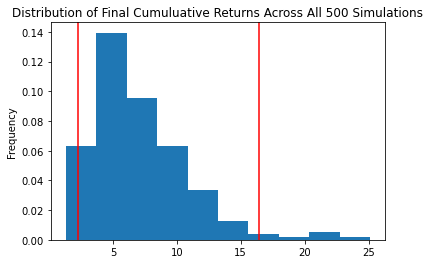

In [25]:
# Plot simulation outcomes: Probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_returns_30_years = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(simulated_returns_30_years)

count           500.000000
mean              7.082042
std               3.724165
min               1.314971
25%               4.538521
50%               6.245694
75%               8.881896
max              25.129005
95% CI Lower      2.304701
95% CI Upper     16.406066
Name: 7560, dtype: float64


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of Savings Portfolio Over Thirty Years'}>

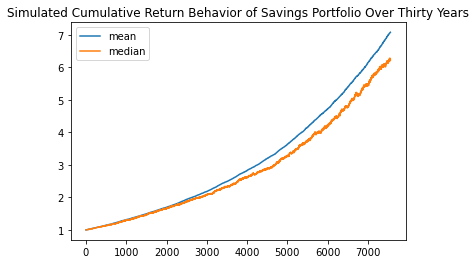

In [27]:
# Plot the simulated cumulative return trajectory for portfolio over the next three years using the mean and median forecasts
df_simulated_returns_30_years[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Savings Portfolio Over Thirty Years")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment_20k = 20000

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_returns = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(portfolio_returns)

count           500.000000
mean              7.082042
std               3.724165
min               1.314971
25%               4.538521
50%               6.245694
75%               8.881896
max              25.129005
95% CI Lower      2.304701
95% CI Upper     16.406066
Name: 7560, dtype: float64


In [30]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for $20,000 investment
portfolio_returns_lower = round(portfolio_returns[8]*20000,2)
portfolio_returns_upper = round(portfolio_returns[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portfolio_returns_lower} and ${portfolio_returns_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $46094.01 and $328121.31.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns_30_years

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,30000.000000,30000.000000,30000.000000,30000.000000
1,30016.438080,30017.125913,29467.616933,30465.649629
2,30023.697033,30009.102997,29334.695302,30810.519918
3,30036.655740,30018.569927,29094.826444,31026.925180
4,30035.043968,30025.431092,29004.639884,31091.337398


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for $20,000 investment
portfolio_returns_lower = round(portfolio_returns[8]*30000,2)
portfolio_returns_upper = round(portfolio_returns[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portfolio_returns_lower} and ${portfolio_returns_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $69141.02 and $492181.97.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# GET 5 YEARS' WORTH OF HISTORICAL PRICE DATA FOR SPY AND AGG
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago
start_date = pd.Timestamp("2017-03-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-02", tz="America/New_York").isoformat()
# Set the stock tickers
ticker = ["AGG", "SPY"]

# Get 5 years worth of historical price data
df_ticker_05_years = api.get_barset(
ticker,
timeframe,
start=start_date,
end=end_date,
limit=1000,
).df

# Display sample data
df_ticker_05_years.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428.0   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074.0   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055.0   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853.0   
2018-02-22 00:00:00-05:00  106.49  106.5600  106.3600  106.36  2150355.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2018-02-15 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09  76314679.0  
2018-02-20 00:00:00-05:00  272.03  273.67  264.84  271.43  54829423.0  
2018-02-21 00:00:00-05:00  271.90  274.72  269.98  270.00  67813909.0  
2018-02-22 00:00:00-05:00  271.09  273.05  269.64  270.32  65771832.0

In [34]:
# Configure Monte Carlo simulation to forecast 5 years daily returns 
MC_05_years = MCSimulation(
    portfolio_data = df_ticker_05_years, 
    weights = [.60,.40], 
    num_simulation = 500, 
    num_trading_days = 252*5
)

# Display sample data
MC_05_years.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428.0   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074.0   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055.0   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853.0   
2018-02-22 00:00:00-05:00  106.49  106.5600  106.3600  106.36  2150355.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-15 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-16 00:00:00-05:00     0.002064  272.31  275.32  272.27  273.09   
2018-02-20 00:00:00-05:00    -0.001217  272.03  273.67  264.84  271.43   
2018-02-21 00:00:00-05:00    -0.003562  271.90  274.72  269.98  270.00   
2018-02-22 00:00:00-05:00     0.000564  271.09  273.05  269.64  270.32   

                                                    
                               volume daily_return  
time                                                
2018-02-15 00:00:00-05:00         NaN          NaN  
2018-02-16 00:00:00-05:00  76314679.0          NaN  
2018-02-20 00:00:00-05:00  54829423.0    -0.006079  
2018-02-21 00:00:00-05:00  67813909.0    -0.005268  
2018-02-22 00:00:00-05:00  65771832.0     0.001185

In [35]:
# Execute Monte Carlo simulation to forecast 5 years cumulative returns 
MC_05_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\CharbelNehme\CNA Immigration 1 Dropbox\Charbel Nehme\PC\Documents\FinTech_USyd\apis-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005787,0.999106,0.997404,1.000861,0.990971,0.998108,1.008389,1.001981,1.002462,0.993873,...,0.996448,1.001584,1.006720,1.007520,0.998391,1.005295,0.993340,0.989422,0.997443,1.005639
2,1.002589,1.004580,1.002735,1.001946,0.992174,0.995803,1.002671,1.010703,1.006149,0.995471,...,1.004988,0.997307,1.015002,1.016129,0.993728,1.012882,0.976160,0.987963,0.995608,1.004247
3,1.002499,1.000743,1.010397,0.991037,0.983600,0.999586,1.000843,1.024207,1.007291,0.995997,...,1.010399,0.992503,1.016492,1.011728,0.995789,1.014316,0.976658,0.989233,0.993843,1.007509
4,1.000817,1.002089,1.012236,0.990075,0.973040,1.007775,0.999959,1.030747,1.013241,1.001281,...,1.008033,0.984810,1.024426,1.021576,0.996411,1.011565,0.978155,1.000801,0.994875,1.014922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.430082,1.440170,1.384456,1.676182,1.410123,0.871440,1.508482,1.845122,1.460442,1.460094,...,1.411707,1.519464,1.443183,1.152504,1.999674,1.168217,1.039427,1.622747,1.369460,1.103354
1257,1.429687,1.443640,1.385632,1.667109,1.400825,0.871513,1.503425,1.851377,1.451827,1.455391,...,1.413706,1.522774,1.439323,1.156111,2.005771,1.174583,1.037728,1.621061,1.365964,1.106915
1258,1.442096,1.454173,1.381849,1.682072,1.409607,0.876823,1.486661,1.836549,1.464292,1.449562,...,1.412126,1.526061,1.458156,1.152698,2.023801,1.180954,1.034368,1.627323,1.361947,1.102107
1259,1.420419,1.456520,1.387781,1.676979,1.416456,0.876966,1.494024,1.843099,1.453749,1.451592,...,1.425586,1.519639,1.452960,1.145192,2.013539,1.176484,1.034284,1.640576,1.361923,1.100461


In [36]:
# Create DataFrame to hold the mean, median, minimum and maximum simulated performance
simulated_returns_05_years = {
"mean": list(MC_05_years.simulated_return.mean(axis=1)),
"median": list(MC_05_years.simulated_return.median(axis=1)),
"min": list(MC_05_years.simulated_return.min(axis=1)),
"max": list(MC_05_years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_05_years = pd.DataFrame(simulated_returns_05_years)

# Display sample data
df_simulated_returns_05_years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000316,1.000374,0.982536,1.016623
2,1.000544,1.000246,0.976160,1.025822
3,1.000789,1.000577,0.975563,1.028160
4,1.001235,1.001289,0.973040,1.031138


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of Portfolio Investments Over Five Years'}>

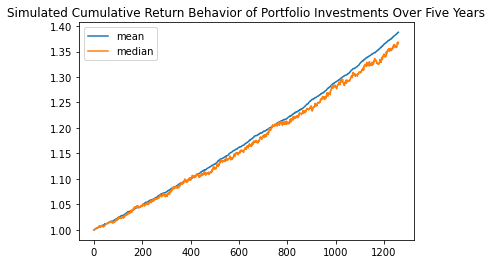

In [37]:
# Plot simulated cumulative return trajectory for portfolio over the next 5 years - mean and median forecasts used below. 
df_simulated_returns_05_years[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Portfolio Investments Over Five Years")

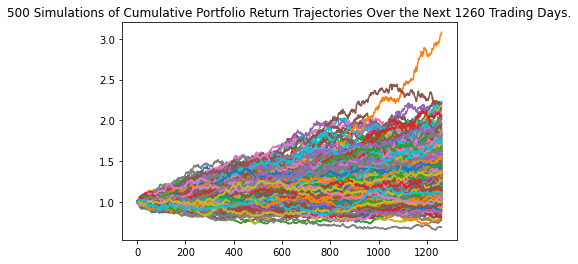

In [38]:
# Plot simulation outcomes: Line plot 
simulated_returns_05_years = MC_05_years.plot_simulation()

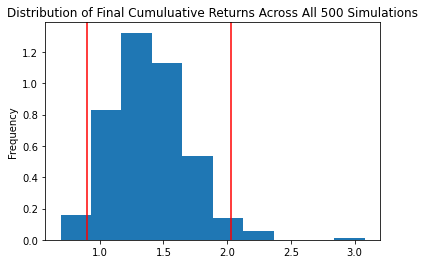

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_05 = MC_05_years.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo Simulation results
five_years = MC_05_years.summarize_cumulative_return()

# Print summary statistics 
print(five_years)

count           500.000000
mean              1.387781
std               0.294548
min               0.692242
25%               1.181602
50%               1.367965
75%               1.554952
max               3.079964
95% CI Lower      0.898617
95% CI Upper      2.028495
Name: 1260, dtype: float64


In [41]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
portfolio_returns_lower_five_years = round(five_years[8]*60000,2)
portfolio_returns_upper_upper_five_years = round(five_years[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${portfolio_returns_lower_five_years} and ${portfolio_returns_upper_upper_five_years}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53917.03 and $121709.69


### Ten Years Retirement Option

In [42]:
# Configure Monte Carlo simulation to forecast 10 years daily returns
MC_10_years = MCSimulation(
    portfolio_data = df_ticker_05_years,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Display sample data
MC_10_years.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428.0   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074.0   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055.0   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853.0   
2018-02-22 00:00:00-05:00  106.49  106.5600  106.3600  106.36  2150355.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-15 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2018-02-16 00:00:00-05:00     0.002064  272.31  275.32  272.27  273.09   
2018-02-20 00:00:00-05:00    -0.001217  272.03  273.67  264.84  271.43   
2018-02-21 00:00:00-05:00    -0.003562  271.90  274.72  269.98  270.00   
2018-02-22 00:00:00-05:00     0.000564  271.09  273.05  269.64  270.32   

                                                    
                               volume daily_return  
time                                                
2018-02-15 00:00:00-05:00         NaN          NaN  
2018-02-16 00:00:00-05:00  76314679.0          NaN  
2018-02-20 00:00:00-05:00  54829423.0    -0.006079  
2018-02-21 00:00:00-05:00  67813909.0    -0.005268  
2018-02-22 00:00:00-05:00  65771832.0     0.001185

In [43]:
# Execute Monte Carlo simulation to forecast 10 years' cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\CharbelNehme\CNA Immigration 1 Dropbox\Charbel Nehme\PC\Documents\FinTech_USyd\apis-homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008003,1.001663,0.999432,1.002481,1.000823,0.996808,1.014281,0.991904,0.994726,0.991282,...,0.994864,1.009591,0.997833,0.996982,0.997027,1.005000,0.995011,0.989658,1.001144,0.996880
2,0.991327,1.006866,1.005591,1.011739,1.009210,0.998552,1.019565,0.993479,1.000706,0.991677,...,0.997234,1.018519,0.988860,0.996290,0.997922,1.004586,0.988062,0.992877,0.997710,0.995338
3,0.992287,1.021426,1.003850,1.010295,1.011650,1.000459,1.012408,0.996248,0.993705,0.990622,...,0.999472,1.019587,0.988594,0.997458,0.997304,1.010505,0.996433,0.982756,0.990419,0.997083
4,0.991938,1.014935,1.000320,1.022307,1.002860,0.997459,1.017068,0.995457,0.996525,0.987133,...,0.995152,1.009739,0.987857,1.004383,0.995446,1.007812,0.983613,0.983379,0.989998,0.994164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.398075,2.257504,2.212401,1.087905,1.503628,1.992087,1.948516,1.994653,1.764006,1.895622,...,2.044198,2.149710,2.189079,1.261113,2.081975,1.983412,1.228467,2.085463,2.580801,2.649794
2517,1.385468,2.268799,2.216019,1.084403,1.496785,1.989479,1.951463,1.980822,1.761557,1.898942,...,2.060038,2.135733,2.181044,1.267638,2.078530,1.988629,1.233838,2.097701,2.568595,2.636060
2518,1.394404,2.277094,2.215000,1.082165,1.491648,2.008501,1.945066,1.973935,1.766250,1.897819,...,2.050789,2.140605,2.188474,1.258100,2.085669,1.979492,1.228114,2.073071,2.585734,2.626723
2519,1.399185,2.285300,2.220664,1.081116,1.480707,2.014739,1.949098,1.960117,1.750600,1.881418,...,2.051890,2.142621,2.189937,1.243156,2.084842,1.983136,1.240527,2.075163,2.606115,2.627393


In [44]:
# Create DataFrame to hold the mean, median, minimum and maximum simulated performan
simulated_returns_10_years = {
"mean": list(MC_10_years.simulated_return.mean(axis=1)),
"median": list(MC_10_years.simulated_return.median(axis=1)),
"min": list(MC_10_years.simulated_return.min(axis=1)),
"max": list(MC_10_years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics 
df_simulated_returns_10_years = pd.DataFrame(simulated_returns_10_years)

# Display sample data 
df_simulated_returns_10_years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999890,0.999961,0.983821,1.017692
2,1.000365,1.000365,0.972339,1.035147
3,1.000752,1.000894,0.961098,1.033821
4,1.001047,1.000699,0.963392,1.041694


In [45]:
df_simulated_returns_10_years.describe()

,mean,median,min,max
count,2521.000000,2521.000000,2521.000000,2521.000000
mean,1.402070,1.373010,0.770623,2.669544
std,0.261516,0.242407,0.051781,0.796656
min,0.999890,0.999961,0.669883,1.000000
25%,1.165688,1.166449,0.732034,2.107509
50%,1.383163,1.357267,0.761611,2.818966
75%,1.631068,1.579665,0.801674,3.220240
max,1.888258,1.829992,1.000000,4.096061


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of Portfolio Investments Over Ten Years'}>

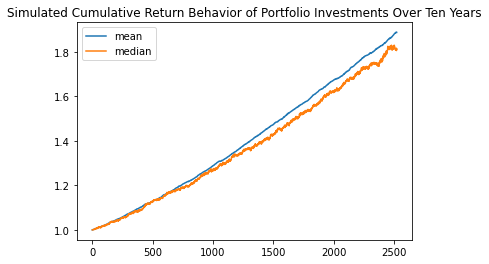

In [46]:
# Plot simulated cumulative return trajectory for portfolio over the next 10 years - mean and median forecasts used below. 
df_simulated_returns_10_years[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Portfolio Investments Over Ten Years")

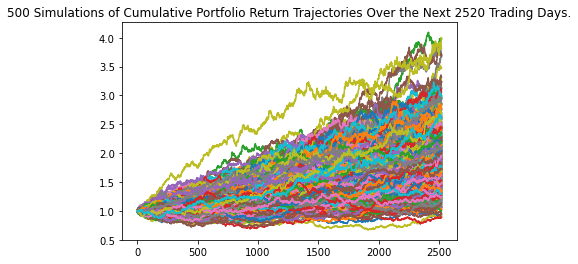

In [47]:
# Plot simulation outcomes: Line plot
simulated_returns_10_years = MC_10_years.plot_simulation()

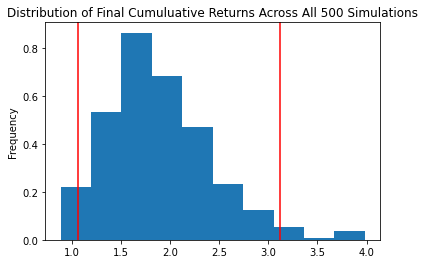

In [48]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10_years.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results 
ten_years = MC_10_years.summarize_cumulative_return()

# Print summary statistics 
print(ten_years)

count           500.000000
mean              1.887745
std               0.533442
min               0.886919
25%               1.521686
50%               1.812304
75%               2.208441
max               3.982943
95% CI Lower      1.066890
95% CI Upper      3.115057
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000 investment
portfolio_returns_lower_ten_years = round(ten_years[8]*60000,2)
portfolio_returns_upper_ten_years = round(ten_years[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${portfolio_returns_lower_ten_years} and ${portfolio_returns_upper_ten_years}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64013.4 and $186903.45
